In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [77]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [78]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [79]:
df = pd.DataFrame(data.data, columns= data.feature_names)

In [80]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [81]:
X = df.iloc[: , :]

In [82]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [83]:
Y = data['target']

In [84]:
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [86]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
71,-0.001882,-0.044642,0.033673,0.125158,0.024574,0.026243,-0.010266,-0.002592,0.026717,0.061054
170,0.023546,0.050680,-0.020218,-0.036656,-0.013953,-0.015092,0.059685,-0.039493,-0.096435,-0.017646
215,0.027178,0.050680,0.094031,0.097615,-0.034592,-0.032002,-0.043401,-0.002592,0.036644,0.106617
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
...,...,...,...,...,...,...,...,...,...,...
309,-0.009147,0.050680,0.001339,-0.002228,0.079612,0.070084,0.033914,-0.002592,0.026717,0.081764
328,-0.038207,-0.044642,0.067085,-0.060756,-0.029088,-0.023234,-0.010266,-0.002592,-0.001496,0.019633
18,-0.038207,-0.044642,-0.010517,-0.036656,-0.037344,-0.019476,-0.028674,-0.002592,-0.018114,-0.017646
155,-0.027310,0.050680,0.060618,0.049415,0.085116,0.086368,-0.002903,0.034309,0.037811,0.048628


In [87]:
Y_train

array([270.,  47., 263., 173., 219.,  99., 253.,  96., 118.,  47., 137.,
       152., 241., 262., 277., 310., 142., 118., 210., 185., 136., 182.,
        78.,  85., 288.,  42., 137., 281., 129.,  75.,  59., 115., 134.,
       249.,  75.,  74., 104., 145., 293., 170., 116., 174., 101., 178.,
        99.,  58., 144., 268., 184.,  96., 121.,  81.,  90.,  64., 101.,
       217.,  87., 139.,  37., 170., 158., 122., 150., 163., 275., 114.,
       242., 281., 143.,  72.,  63., 168., 103.,  88., 220., 237.,  77.,
        51.,  90.,  63., 127.,  79., 175., 102., 200., 259., 191., 102.,
       124., 131., 168.,  59., 317.,  42., 230., 229., 180.,  89., 232.,
       104.,  94., 206., 164., 272., 182.,  68., 257.,  74., 242., 178.,
       220.,  83.,  78., 265.,  44.,  42., 202., 158., 132.,  97., 139.,
       110., 101., 103., 192., 128., 179.,  69.,  45., 134., 146.,  69.,
       220., 243., 196.,  97.,  88., 336., 279.,  85., 142., 140.,  77.,
       167., 177.,  94.,  96., 242.,  61., 310.,  6

In [88]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.150483,0.201013,0.324669,0.316115,0.274361,-0.067058,0.230298,0.285349,0.326054
sex,0.150483,1.000000,0.052344,0.209430,0.041213,0.146453,-0.375369,0.320217,0.123225,0.206963
bmi,0.201013,0.052344,1.000000,0.400979,0.286365,0.294730,-0.379409,0.447357,0.476040,0.422592
bp,0.324669,0.209430,0.400979,1.000000,0.244657,0.173910,-0.129720,0.221721,0.362977,0.408358
s1,0.316115,0.041213,0.286365,0.244657,1.000000,0.902639,0.026177,0.567536,0.540517,0.349045
s2,0.274361,0.146453,0.294730,0.173910,0.902639,1.000000,-0.227992,0.686529,0.348963,0.313589
s3,-0.067058,-0.375369,-0.379409,-0.129720,0.026177,-0.227992,1.000000,-0.738011,-0.368400,-0.319941
s4,0.230298,0.320217,0.447357,0.221721,0.567536,0.686529,-0.738011,1.000000,0.606622,0.465108
s5,0.285349,0.123225,0.476040,0.362977,0.540517,0.348963,-0.368400,0.606622,1.000000,0.504244
s6,0.326054,0.206963,0.422592,0.408358,0.349045,0.313589,-0.319941,0.465108,0.504244,1.000000


<Axes: >

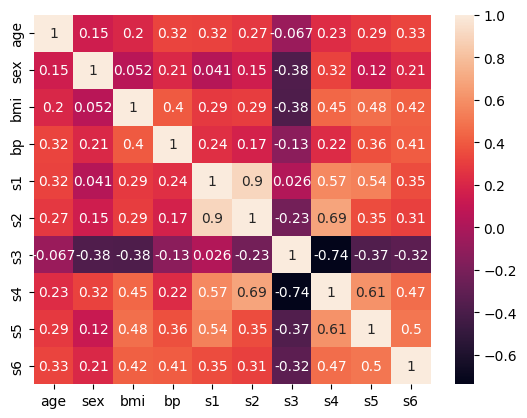

In [89]:
sns.heatmap(X_train.corr() , annot=True)


In [90]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(X_train, Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [91]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
grid=GridSearchCV ( estimator= model,param_grid=param,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)

In [94]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,Y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [95]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [96]:
grid.best_score_

np.float64(-3981.922839750391)

In [97]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [98]:
Y_pred=grid.predict(X_test)

In [99]:
print(r2_score(Y_test, Y_pred))
print(mean_absolute_error(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

0.4221564717907792
49.54705020587278
3607.006646280198


In [100]:
selectedmodel=DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_features='log2',splitter='best')

In [103]:
selectedmodel.fit(X_train,Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.875, 'x[6] <= -0.016\nsquared_error = 5783.379\nsamples = 309\nvalue = 150.227'),
 Text(0.25, 0.625, 'x[4] <= -0.006\nsquared_error = 6174.92\nsamples = 117\nvalue = 187.949'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= 0.074\nsquared_error = 7321.893\nsamples = 45\nvalue = 163.2'),
 Text(0.0625, 0.125, 'squared_error = 6301.287\nsamples = 41\nvalue = 151.073'),
 Text(0.1875, 0.125, 'squared_error = 825.25\nsamples = 4\nvalue = 287.5'),
 Text(0.375, 0.375, 'x[9] <= 0.026\nsquared_error = 4835.993\nsamples = 72\nvalue = 203.417'),
 Text(0.3125, 0.125, 'squared_error = 3154.564\nsamples = 31\nvalue = 172.871'),
 Text(0.4375, 0.125, 'squared_error = 4868.445\nsamples = 41\nvalue = 226.512'),
 Text(0.75, 0.625, 'x[8] <= -0.008\nsquared_error = 4149.266\nsamples = 192\nvalue = 127.24'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[8] <= -0.036\nsquared_error = 2662.018\nsamples = 127\nvalue = 105.606'),
 Text(0.5625, 0.125, 'squared_error = 1728.66\nsam

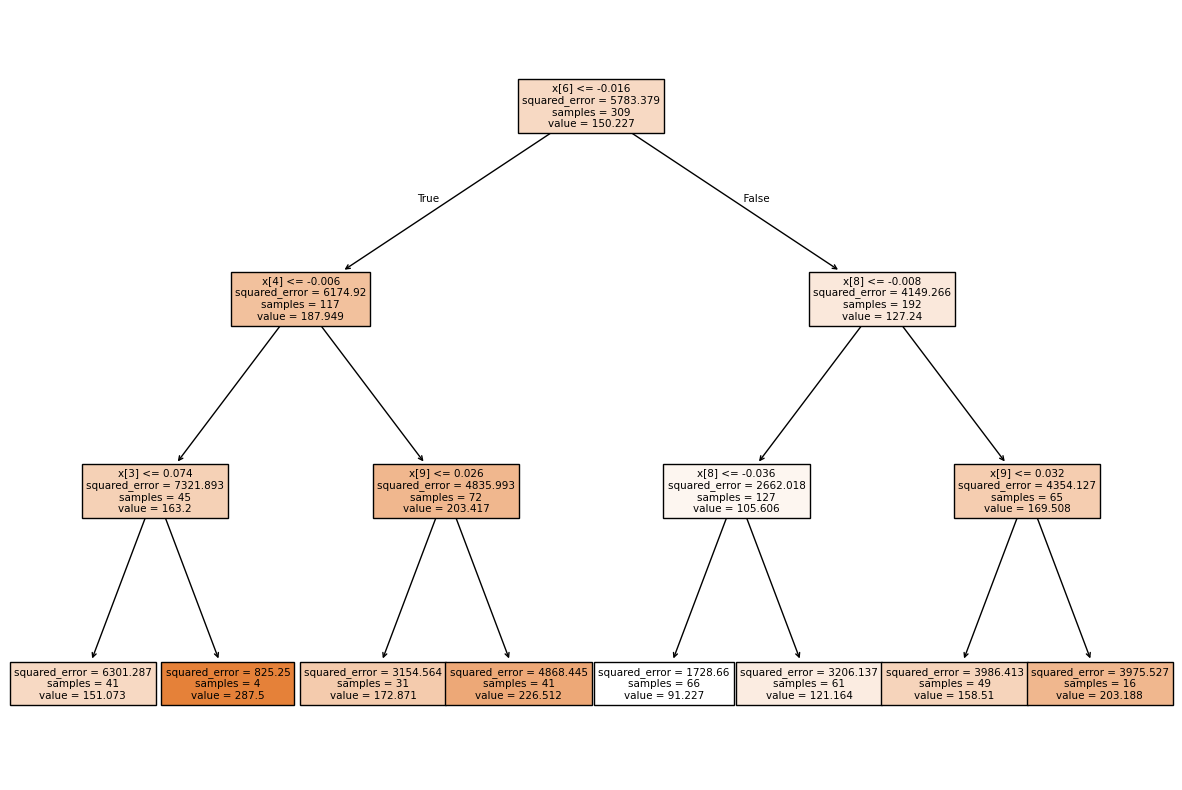

In [104]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)